# First Order Circuit

<img src="1Order_schematic.jpeg" width ="400" height=400>

### Goal 
Compute the capacitor voltage $v_c(t)$ for $t_0=5$s.


## LTspice netlist and Python
**(file "FirstOrder.cir")**

```
* First Order - SPICE

.model MySwitch SW (Ron = 1m, Roff=1G, Vt=0, Vh = 0)

V1 1 0 DC 2
R1 1 2 1

S1 2 3 c1 0 MySwitch
R2 3 4 2
C1 4 0 1
R3 3 5 3
V2 5 0 DC 3


* switch control
*V3 c1 0 PWL(0 0 0.9 0 1 1 2 1)
V3 c1 0 pulse(0 1 5 1m 1m 30 30)

.TRAN 30
.print V(4) V(c1) I(S1)
.end
```


In [1]:
import os
import ltspice
import matplotlib.pyplot as plt
import numpy as np
import math

#%matplotlib inline

import mpld3
mpld3.enable_notebook()


import warnings
warnings.filterwarnings("ignore")


#Run the simulation and save in binary .raw
os.system('/Applications/LTspice.app/Contents/MacOS/LTspice -b FirstOrder.cir')

0

In [2]:
#read the raw file generated by LTspice

filepath = 'FirstOrder.raw'


l = ltspice.Ltspice(filepath)
l.parse() # Data loading sequence. It may take few minutes for huge file.

print(l.variables)

['time', 'V(c1)', 'V(4)', 'I(S1)']


In [3]:
var = l.variables

time = l.get_time()

vc_spice= l.getData(var[2])

## Analytical Solution

$$v_c(t)=[v_c(t_0^-)+v_c(\infty)]\exp(-(t-t_0)/\tau)+v_c(\infty)$$

for $t\geq t_0$.

For the considered example: $t_0=1$s, $v_c(t_0^-)=3$V, $v_c(\infty)=$, $\tau= 4/11$s. 

In [4]:
t0 = 5
vc_0 = 3
vc_inf = 9/4

Req = 11/4
C = 1
tau = C*Req

vc_analytical= np.zeros(len(time))

for ii in range(len(time)):
    if time[ii]<t0:
        vc_analytical[ii] = vc_0
    else:
        vc_analytical[ii] = (vc_0-vc_inf)*np.exp(-(time[ii]-t0)/tau)+vc_inf 

Text(0, 0.5, 'Voltage (V)')

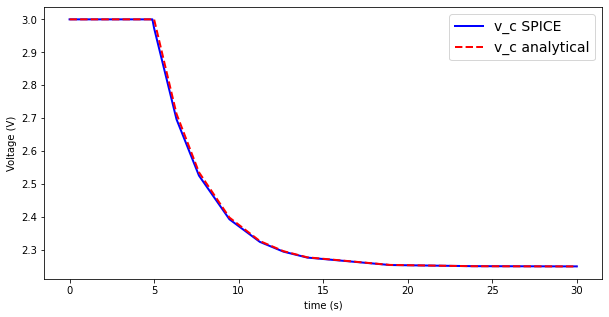

In [5]:
#PLOT
plt.figure(figsize=(10, 5))

plt.plot(time,vc_spice,color='blue',lw=2,label='v_c SPICE')
plt.plot(time,vc_analytical,color='red',linestyle='dashed',lw=2,label='v_c analytical')


plt.legend(loc="best",  scatterpoints=1, prop={'size': 14})
plt.xlabel('time (s)')
plt.ylabel('Voltage (V)')
#plt.title('')
#plt.savefig('test_noise_level_v1.pdf')

## First Order Circuit - UIC

<img src="1Order_schematic.jpeg" width ="500" height=400>


### Goal 
Compute the voltage $v_c(t)$ by specifying the IC.

## LTspice netlist and Python
**(file "FirstOrder_UIC.cir")**

```
* First Order UIC - SPICE

V1 1 0 2
R1 1 3 1

R2 3 4 2
C1 4 0 1 IC=3V
R3 3 5 3
V2 5 0 3


.TRAN 25 UIC
.print V(4) 
.end
```

In [6]:
#Run the simulation and save in binary .raw
os.system('/Applications/LTspice.app/Contents/MacOS/LTspice -b FirstOrder_UIC.cir')


#read the raw file generated by LTspice

filepath = 'FirstOrder_UIC.raw'


l = ltspice.Ltspice(filepath)
l.parse() # Data loading sequence. It may take few minutes for huge file.

print(l.variables)

['time', 'V(4)']


In [7]:
var = l.variables

time_uic = l.get_time()

vc_spice_uic= l.getData(var[1])

Text(0, 0.5, 'Voltage (V)')

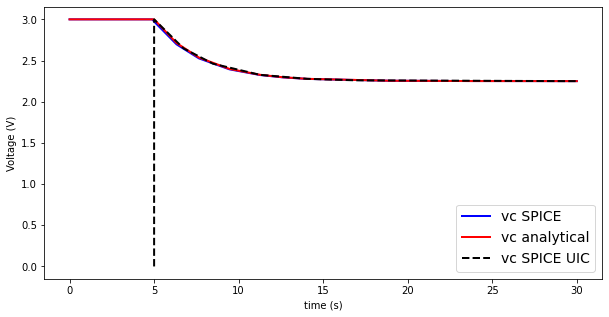

In [8]:
#PLOT
plt.figure(figsize=(10, 5))

plt.plot(time,vc_spice,color='blue',lw=2,label='vc SPICE')
plt.plot(time,vc_analytical,color='red',lw=2,label='vc analytical')
plt.plot(time_uic+t0,vc_spice_uic,color='black',linestyle='dashed',lw=2,label='vc SPICE UIC')


plt.legend(loc="best",  scatterpoints=1, prop={'size': 14})
plt.xlabel('time (s)')
plt.ylabel('Voltage (V)')
#plt.title('')
#plt.savefig('test_noise_level_v1.pdf')